### Examples of data preprocessing

The library provides useful preprocessing functions for data classes `Tabular`, `Image` and `Text`. 

#### Tabular data
Suppose we have a tabular dataset containing categorical columns, continuous-valued columns and target column:

In [1]:
import pandas as pd
from omnixai.data.tabular import Tabular

df = pd.DataFrame(
    data=[[1, 2, 3, 'male', 'yes'], 
          [4, 5, 6, 'female', 'no'], 
          [7, 8, 9, 'female', 'yes']],
    columns=['a', 'b', 'c', 'd', 'label']
)
x = Tabular(
    data=df,
    categorical_columns=['d'],
    target_column='label'
)
print(x)

   a  b  c       d label
0  1  2  3    male   yes
1  4  5  6  female    no
2  7  8  9  female   yes


The class `TabularTransform` in `omnixai.preprocessing.tabular` defines a useful preprocessing function for `Tabular`:

In [2]:
from omnixai.preprocessing.tabular import TabularTransform
from omnixai.preprocessing.encode import OneHot, Ordinal, LabelEncoder
from omnixai.preprocessing.normalize import MinMax, Standard

# One-hot encoding for categorical features
# Min-max normalization for continuous-valued features
# Label encoding for the target
transform = TabularTransform(
    cate_transform=OneHot(),
    cont_transform=MinMax(),
    target_transform=LabelEncoder()
).fit(x)

We can do the preprocessing by calling `transform.transform`. The output of this function is a numpy array whose columns are sorted according to `[categorical columns, continuous-valued columns, target column]`.

In [3]:
# Transform
y = transform.transform(x)
print(y)
# Inverse transform
z = transform.invert(y)
print(z)

[[0.  1.  0.  0.  0.  1. ]
 [1.  0.  0.5 0.5 0.5 0. ]
 [1.  0.  1.  1.  1.  1. ]]
     a    b    c       d label
0  1.0  2.0  3.0    male   yes
1  4.0  5.0  6.0  female    no
2  7.0  8.0  9.0  female   yes


Let's try other transforms:

In [4]:
# Ordinal encoding for categorical features
# Standard normalization for continuous-valued features
# Label encoding for the target
transform = TabularTransform(
    cate_transform=Ordinal(),
    cont_transform=Standard(),
    target_transform=LabelEncoder()
).fit(x)

In [5]:
# Transform
y = transform.transform(x)
print(y)
# Inverse transform
z = transform.invert(y)
print(z)

[[ 1.         -1.22474487 -1.22474487 -1.22474487  1.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          1.22474487  1.22474487  1.22474487  1.        ]]
     a    b    c       d label
0  1.0  2.0  3.0    male   yes
1  4.0  5.0  6.0  female    no
2  7.0  8.0  9.0  female   yes


If a `Tabular` object contains NaNs, `FillNaNTabular` can be applied to remove those NaNs:

In [6]:
import numpy as np

x = Tabular(
    data=pd.DataFrame({
        'A': [1, np.nan, 2, 6],
        'B': [5, np.nan, np.nan, 2],
        'C': ['a', 'b', 'c', 'd']
    }), 
    categorical_columns=['C']
)
print(x)

     A    B  C
0  1.0  5.0  a
1  NaN  NaN  b
2  2.0  NaN  c
3  6.0  2.0  d


In [7]:
from omnixai.preprocessing.fill import FillNaNTabular

# Fill NaNs with mean values
transform = FillNaNTabular(value='mean').fit(x)
print(transform.transform(x))
# Fill NaNs with median values
transform = FillNaNTabular(value='median').fit(x)
print(transform.transform(x))

     A    B  C
0  1.0  5.0  a
1  3.0  3.5  b
2  2.0  3.5  c
3  6.0  2.0  d
     A    B  C
0  1.0  5.0  a
1  2.0  3.5  b
2  2.0  3.5  c
3  6.0  2.0  d


#### Image data
The package `omnixai.preprocessing.image` defines several useful preprocessing functions for image data. For example,

Data shape: (1, 224, 224, 3)
Min value: 0
Max value: 255


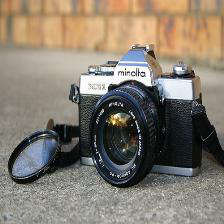

Min value: 0.0
Max value: 1.0


In [8]:
from PIL import Image as PilImage
from omnixai.data.image import Image
from omnixai.preprocessing.image import Scale, Resize

img = Image(PilImage.open('../data/images/camera.jpg').convert('RGB'))
print(f"Data shape: {img.shape}")
print(f"Min value: {np.min(img.values)}")
print(f"Max value: {np.max(img.values)}")
display(img.to_pil())

# Scale pixel values
x = Scale().transform(img)
print(f"Min value: {np.min(x.values)}")
print(f"Max value: {np.max(x.values)}")

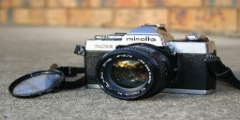

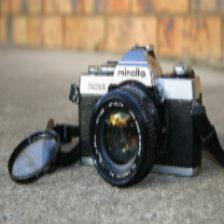

In [9]:
# Resize image
transform = Resize(size=(120, 240))
x = transform.transform(img)
display(x.to_pil())
y = transform.invert(x)
display(y.to_pil())

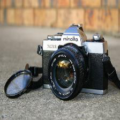

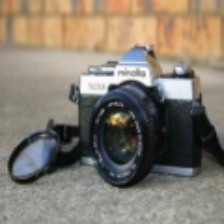

In [10]:
transform = Resize(size=120)
x = transform.transform(img)
display(x.to_pil())
y = transform.invert(x)
display(y.to_pil())

#### Text data
For `Text`, two transforms are supported in the library. One is `Tfidf` and the other one is `Word2Id`:

In [11]:
from omnixai.data.text import Text
from omnixai.preprocessing.text import Tfidf, Word2Id

text = Text(
    data=["Hello I'm a single sentence.",
          "And another sentence.",
          "And the very very last one."]
)
print(text)

["Hello I'm a single sentence.", 'And another sentence.', 'And the very very last one.']


`Tfidf` is applied to compute TF-IDF feature vectors given a batch of sentences:

In [12]:
transform = Tfidf()
transform.fit(text)
vectors = transform.transform(text)
print(vectors)
print(vectors.shape)
print(transform.get_feature_names())

  (0, 6)	0.6227660078332259
  (0, 5)	0.4736296010332684
  (0, 2)	0.6227660078332259
  (1, 5)	0.5178561161676974
  (1, 1)	0.680918560398684
  (1, 0)	0.5178561161676974
  (2, 8)	0.7265094189091538
  (2, 7)	0.3632547094545769
  (2, 4)	0.3632547094545769
  (2, 3)	0.3632547094545769
  (2, 0)	0.2762645695949752
(3, 9)
['and', 'another', 'hello', 'last', 'one', 'sentence', 'single', 'the', 'very']


`Word2Id` converts tokens into token IDs:

In [13]:
transform = Word2Id()
transform.fit(text)
ids = transform.transform(text)
print(ids)
print(transform.invert(ids))

[[6, 7, 8, 9, 3], [4, 10, 3], [4, 11, 5, 5, 12, 13]]
[['hello', 'i', 'a', 'single', 'sentence'], ['and', 'another', 'sentence'], ['and', 'the', 'very', 'very', 'last', 'one']]


In [14]:
# Unknown tokens will be converted into "<UNK>"
text = Text(data=["Hello I'm a single xxx"])
print(transform.transform(text))
print(transform.invert(transform.transform(text)))

[[6, 7, 8, 9, 2]]
[['hello', 'i', 'a', 'single', '<UNK>']]
